In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)


In [3]:
df_JP = pd.read_excel("Japan_Data.xlsx")
df_FoF = pd.read_excel("FoF_Data.xlsx")
df_US = pd.read_excel("US_Data.xlsx")
df_Fin = pd.read_csv("Financial_Data.csv")


In [4]:
df_JP = df_JP.drop(df_JP.index[range(0, 7)])
df_JP = df_JP.astype("float64")
df_JP["Year"] = df_JP["Series"].astype("int")
df_JP = df_JP.drop(["Series"], axis=1)


In [5]:
df_Fin = df_Fin.drop(df_Fin.index[0])
df_Fin = df_Fin.iloc[::-1]  # exchange top and down
df_Fin = df_Fin.replace(",", "", regex=True)  # regex: (regular expression)
df_Fin[df_Fin.columns[df_Fin.columns != 'month']] = df_Fin[df_Fin.columns[df_Fin.columns != 'month']].astype("float64")
df_Fin[df_Fin.columns[df_Fin.columns != 'month']] = df_Fin[df_Fin.columns[df_Fin.columns != 'month']].rolling(12).mean()


In [6]:
df_Fin = df_Fin[df_Fin["month"].str.contains("Jan")]
df_Fin = df_Fin.replace("-Jan", "", regex=True)
df_Fin = df_Fin.replace("Jan-", "", regex=True)
df_Fin = df_Fin.drop(["month"], axis=1)
df_Fin["Year"] = range(len(df_Fin))
df_Fin["Year"] = df_Fin["Year"] + 1970



In [7]:
df_FoF = df_FoF.drop(df_FoF.index[range(0, 7)])
df_FoF = df_FoF.astype("float64")
df_FoF["Year"] = df_FoF["Series"].astype("int")
df_FoF = df_FoF.drop(["Series"], axis=1)

In [8]:
df = pd.merge(df_JP, df_Fin, on="Year")
df = pd.merge(df, df_FoF, on="Year")
df = pd.merge(df, df_US, on="Year")



In [9]:
df.head()


,GDP,Priv. Consumption,Gov. Consumption,Priv. Inverstment,Gov. Investment,Inventory,Net Exports,GDP Deflator,Compensation of Employee,Wage and Salaries,Employed person,Employee,Hours worked,Fixed Assets,Real Compensation of Employee,Share of labor compensation,Real Wage and Salaries,Real Wage and Salaries.1,Fixed Assets.1,CPI,Population over 15,Labor force,Number of employed person,Employee.1,Population,Penn GDP,Labor Share,Capital,TFP,Entry,Exit,M2,M3,Nikkei225,General Government \nnet lending/borrowing,Net Lending/Borrowing,Primary Net Lending/Borrowing,Primary Net Lending/Borrowing.1,General Government Net Debt,Net Debt,General Government Gross Debt,Gross Debt,Year,S&P 500,S&P 500 TR,Nikkei 225,Nikkei 225 TR,Depreciation rate,Total Assets,Government Bonds,Other Bonds,Equity and Funds,Insurance and pention,Currency and Deposit,Total Government Debt,Financial Institution,Households,Overseas,Others (including overseas before 97),Bank of Japan,Bank,Insurance,Other financial Institution,Nominal GDP US,Estabs Exit Rate US,Estabs Entry Rate US
0,184320.009673,105737.865119,27085.649614,40222.931698,14936.839646,3129.899194,-1444.913834,40.170012,31728.987383,29351.030343,5369.282989,3682.631909,NaN,94634.777733,78986.750889,42.853053,73067.018940,1.984098e+06,235585.634171,30.9,7885.0,5153.0,5094.0,3306.0,104.929251,1601754.125,0.620528,5270958.5,0.786710,NaN,NaN,18.316667,NaN,2192.822823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,84.355833,NaN,NaN,NaN,NaN,7.486012e+05,5821.546512,43464.624065,122811.505322,98996.637155,431134.506484,48091.491483,35389.765714,6225.888236,NaN,4729.274368,13293.915133,11938.074639,297.657879,10936.600618,1073.3105,NaN,NaN
1,192410.107680,111547.484824,28401.563787,40121.730232,17714.738417,1538.330171,-1053.336137,42.441838,37614.934961,34710.091261,5395.671995,3719.713698,NaN,112524.265522,88627.017024,46.061518,81782.724129,2.198630e+06,265125.807241,32.9,7979.0,5186.0,5121.0,3412.0,106.427103,1677020.375,0.620528,5929284.0,0.778381,NaN,NaN,20.341667,NaN,2389.819556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971,98.878333,NaN,NaN,NaN,14.869088,8.939130e+05,6225.888236,54693.997342,146960.755517,118704.503631,509811.661347,72349.690507,55746.719691,9104.996176,NaN,4541.640634,4306.756530,30692.270665,575.075022,19291.472872,1164.84975,NaN,NaN
2,208598.623013,121560.530705,29811.788720,43120.939838,20588.676930,1584.609227,-1571.915993,44.816929,43775.139586,40456.993453,5417.047089,3728.461593,NaN,143873.973155,97675.456344,46.824593,90271.677835,2.421151e+06,321025.954844,34.5,8070.0,5199.0,5126.0,3465.0,107.976027,1818117.375,0.620528,6636370.0,0.799158,NaN,NaN,26.500000,NaN,3753.717480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,110.789167,NaN,NaN,NaN,13.312689,1.163182e+06,9104.996176,66875.269726,241510.283975,141484.407915,643475.931015,90560.619308,70149.352012,10629.802920,NaN,5810.994151,8783.128471,21438.850124,595.315758,36404.078510,1279.112,NaN,NaN
3,225354.515953,132265.939750,31423.229023,49418.312642,21607.104409,1921.334203,-3225.697488,50.496493,54867.103747,50802.599354,5479.940886,3791.864485,NaN,201080.968813,108655.275064,48.215264,100606.192597,2.653212e+06,398207.787264,38.6,8172.0,5289.0,5223.0,3591.0,109.528512,1964159.375,0.620528,7417648.0,0.814417,NaN,NaN,22.991667,NaN,4757.348480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,104.887500,NaN,NaN,NaN,13.064797,1.334353e+06,10629.802920,79193.170274,191744.767123,166830.907888,794405.497262,112872.179726,87979.420175,12932.439727,NaN,6861.064870,30153.441194,16250.793396,321.470509,40947.956402,1425.376,NaN,NaN
4,222593.382670,132154.867515,31290.850490,45895.794724,19060.165260,2910.916746,-2032.182042,60.926239,69619.868043,64524.087093,5560.691243,3877.872558,NaN,252143.798831,114269.104259,51.335355,105905.251510,2.731014e+06,413850.914209,47.5,8238.0,5326.0,5259.0,3615.0,111.022689,1940093.625,0.620528,8060057.0,0.791025,NaN,NaN,11.975000,NaN,4277.074959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974,79.850000,NaN,NaN,NaN,12.281318,1.548214e+06,12932.439727,9

## Real Economy
- Source
 - Cabinet Office "National Accounts of Japan"

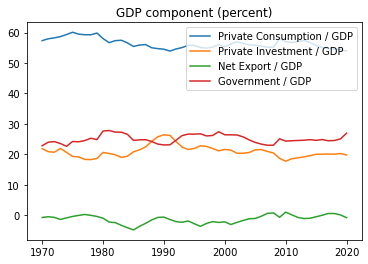

In [10]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Priv. Consumption"] / df["GDP"]*100
ax.plot(x, y, label="Private Consumption / GDP")

y = df["Priv. Inverstment"] / df["GDP"]*100
ax.plot(x, y, label="Private Investment / GDP")

y = df["Net Exports"] / df["GDP"]*100
ax.plot(x, y, label="Net Export / GDP")

y = (df["Gov. Consumption"]+df["Gov. Investment"])/ df["GDP"]*100
ax.plot(x, y, label="Government / GDP")

ax.set_title("GDP component (percent)")
ax.legend()
plt.show()

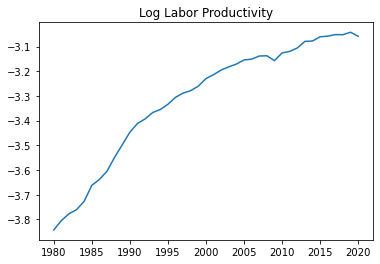

In [11]:
fig, ax = plt.subplots()
x = df["Year"]
y = np.log(df["GDP"]/(df["Employed person"]*df["Hours worked"]))
ax.plot(x, y)
ax.set_title("Log Labor Productivity")
plt.show()

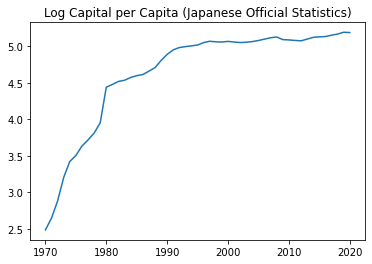

In [12]:
fig, ax = plt.subplots()
x = df["Year"]
y = np.log(df["Fixed Assets"] / df["Population over 15"])
ax.plot(x, y)
ax.set_title("Log Capital per Capita (Japanese Official Statistics)")
plt.show()

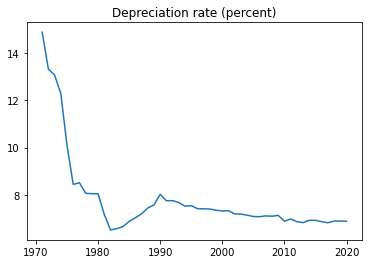

In [13]:
fig, ax = plt.subplots()
x = df["Year"]
y = df["Depreciation rate"] 
ax.plot(x, y)
ax.set_title("Depreciation rate (percent)")
plt.show()

## Government Bond Market
- Source
 - Bank of Japan "Flow of Funds"

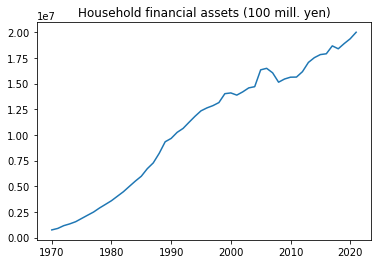

In [14]:
fig, ax = plt.subplots()
x = df["Year"]
#y = df["Total Assets"]/ df["Population over 15"]
y = df["Total Assets"]
ax.plot(x, y)
ax.set_title("Household financial assets (100 mill. yen)")
plt.show()

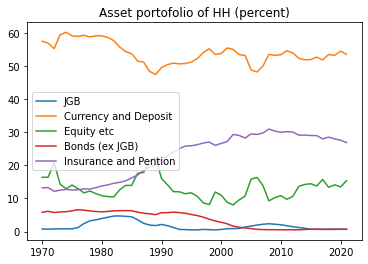

In [15]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Government Bonds"] / df["Total Assets"]*100
ax.plot(x, y, label="JGB")

y = df["Currency and Deposit"] / df["Total Assets"]*100
ax.plot(x, y, label="Currency and Deposit")

y = df["Equity and Funds"] / df["Total Assets"]*100
ax.plot(x, y, label="Equity etc")

y = df["Other Bonds"] / df["Total Assets"]*100
ax.plot(x, y, label="Bonds (ex JGB)")

y = df["Insurance and pention"] / df["Total Assets"]*100
ax.plot(x, y, label="Insurance and Pention")

ax.set_title("Asset portofolio of HH (percent)")
ax.legend()
plt.show()

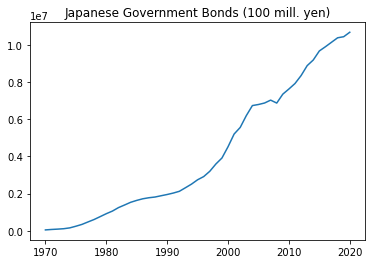

In [16]:
fig, ax = plt.subplots()
x = df["Year"]
#y = df["Total Government Deb"]/ df["Population over 15"]
y = df["Total Government Debt"]
ax.plot(x, y)
ax.set_title("Japanese Government Bonds (100 mill. yen)")
plt.show()

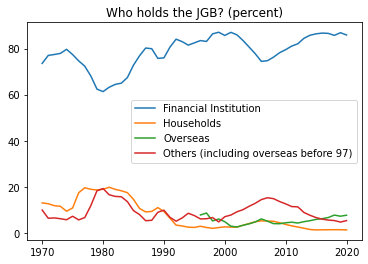

In [17]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Financial Institution"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Financial Institution")

y = df["Households"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Households")

y = df["Overseas"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Overseas")

y = df["Others (including overseas before 97)"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Others (including overseas before 97)")

ax.set_title("Who holds the JGB? (percent)")
ax.legend()
plt.show()

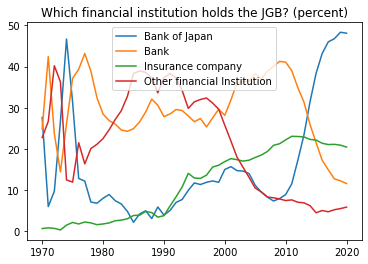

In [18]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Bank of Japan"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Bank of Japan")

y = df["Bank"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Bank")

y = df["Insurance"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Insurance company")

y = df["Other financial Institution"] / df["Total Government Debt"]*100
ax.plot(x, y, label="Other financial Institution")

ax.set_title("Which financial institution holds the JGB? (percent)")
ax.legend()
plt.show()

## Stock Return

- Comparison between US and Japan


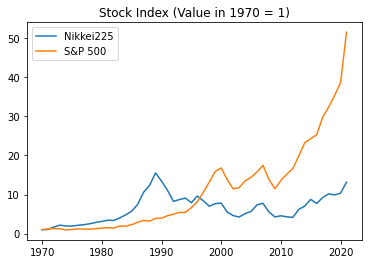

In [19]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Nikkei225"]
y = y / y.iat[0]
ax.plot(x, y, label="Nikkei225")

y = df["S&P 500"]
y = y / y.iat[0]
ax.plot(x, y, label="S&P 500")

ax.legend()
ax.set_title("Stock Index (Value in 1970 = 1)")
plt.show()


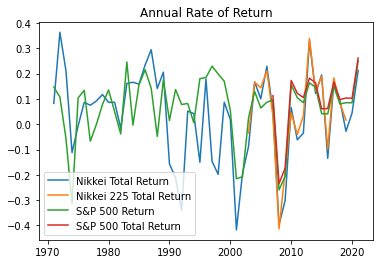

In [20]:
fig, ax = plt.subplots()
x = df["Year"]

y = (df["Nikkei225"] - df["Nikkei225"].shift(1)) / df["Nikkei225"]
ax.plot(x, y, label="Nikkei Total Return")

y = (df["Nikkei 225 TR"] - df["Nikkei 225 TR"].shift(1)) / df["Nikkei 225 TR"]
ax.plot(x, y, label="Nikkei 225 Total Return")

y = (df["S&P 500"] - df["S&P 500"].shift(1)) / df["S&P 500"]
ax.plot(x, y, label="S&P 500 Return")

y = (df["S&P 500 TR"] - df["S&P 500 TR"].shift(1)) / df["S&P 500 TR"]
ax.plot(x, y, label="S&P 500 Total Return")

ax.legend()
ax.set_title("Annual Rate of Return")
plt.show()


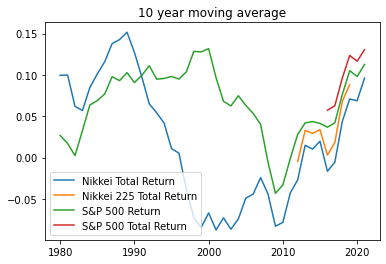

In [21]:
fig, ax = plt.subplots()
x = df["Year"]

y = (df["Nikkei225"] - df["Nikkei225"].shift(1)) / df["Nikkei225"]
y = y.rolling(10).mean()
ax.plot(x, y, label="Nikkei Total Return")

y = (df["Nikkei 225 TR"] - df["Nikkei 225 TR"].shift(1)) / df["Nikkei 225 TR"]
y = y.rolling(10).mean()
ax.plot(x, y, label="Nikkei 225 Total Return")

y = (df["S&P 500"] - df["S&P 500"].shift(1)) / df["S&P 500"]
y = y.rolling(10).mean()
ax.plot(x, y, label="S&P 500 Return")

y = (df["S&P 500 TR"] - df["S&P 500 TR"].shift(1)) / df["S&P 500 TR"]
y = y.rolling(10).mean()
ax.plot(x, y, label="S&P 500 Total Return")

ax.legend()
ax.set_title("10 year moving average")
plt.show()


- Nominal GDP
    - Japan: Japan official statistics
    - US: Pen table

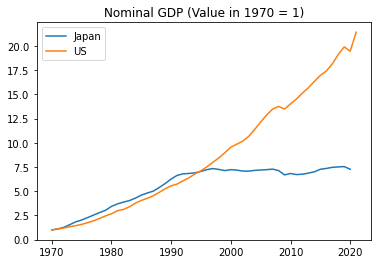

In [22]:
df["Nominal GDP"] = df["GDP"] * df["GDP Deflator"]

fig, ax = plt.subplots()
x = df["Year"]

y = df["Nominal GDP"]
y = y / y.iat[0]
ax.plot(x, y, label="Japan")
y = df["Nominal GDP US"]
y = y / y.iat[0]
ax.plot(x, y, label="US")

ax.legend()
ax.set_title("Nominal GDP (Value in 1970 = 1)")
plt.show()


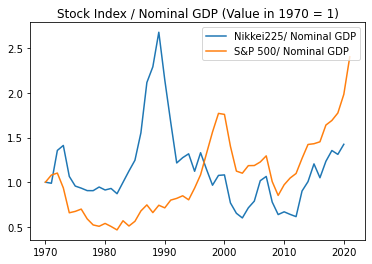

In [23]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Nikkei225"] / df["Nominal GDP"]
y = y / y.iat[0]
ax.plot(x, y, label="Nikkei225/ Nominal GDP")
y = df["S&P 500"] / df["Nominal GDP US"]
y = y / y.iat[0]
ax.plot(x, y, label="S&P 500/ Nominal GDP")

ax.legend()
ax.set_title("Stock Index / Nominal GDP (Value in 1970 = 1)")
plt.show()


## Entry and Exit Rate

- Comparison between US and Japan
- Source
  - Japan: Ministry of Health, Labor and Welfare "Employment Insurance Business Annual Report"
  - US: Business Dynamics Statistics


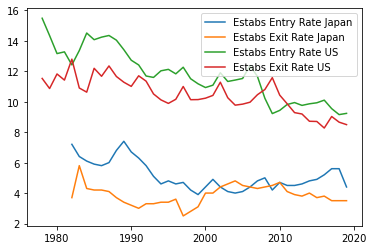

In [24]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Entry"] * 100
ax.plot(x, y, label="Estabs Entry Rate Japan")

y = df["Exit"] * 100
ax.plot(x, y, label="Estabs Exit Rate Japan")

y = df["Estabs Entry Rate US"]
ax.plot(x, y, label="Estabs Entry Rate US")

y = df["Estabs Exit Rate US"]
ax.plot(x, y, label="Estabs Exit Rate US")

ax.legend()

plt.show()
